In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import warnings
warnings.filterwarnings('ignore')

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/my-data-2/Retail.OrderHistory.Clean.csv


# E-commerce data

## This data is my personal data from online e-commerce website to analyse the data and get an insight

### Importing the dataset

In [2]:
orders_df = pd.read_csv('/kaggle/input/my-data-2/Retail.OrderHistory.Clean.csv',encoding='utf8',encoding_errors='ignore')
print('orders_df:',orders_df.shape)

orders_df: (113, 24)


### Basic data analysis and cleaning

In [3]:
orders_df.head()

,Order ID,Order Date,Purchase Order Number,Currency,Unit Price,Unit Price Tax,Shipping Charge,Total Discounts,Total Owed,Shipment Item Subtotal,...,Payment Instrument Type,Order Status,Shipment Status,Ship Date,Shipping Option,Unnamed: 19,Product Name,Gift Message,Gift Sender Name,Gift Recipient Contact Details
0,402-3170714-4132350,03/24/2023 02:28:49 UTC,NaN,INR,"6,205.36",744.64,0.00,0,"6,950","6,205.36",...,NaN,Closed,Shipped,03/27/2023 07:43:22 UTC,Std IN EZ Metro COD,NaN,Rynox Air GT 4 Jacket - Mesh Motorcycle Riding...,NaN,NaN,NaN
1,402-0957206-0852356,03/03/2023 08:02:35 UTC,NaN,INR,226.27,40.73,6.10,0,267,226.27,...,NaN,Closed,Shipped,03/13/2023 09:24:47 UTC,std-in-10k,NaN,3M Auto Specialty Tyre Dresser (250 ml) | Long...,NaN,NaN,NaN
2,402-0957206-0852356,03/03/2023 08:02:35 UTC,NaN,INR,168.64,30.36,6.10,0,199,366.1,...,NaN,Closed,Shipped,03/03/2023 11:15:18 UTC,std-in-10k,NaN,Motul C2 Chain Lube for All Bikes (150 ml),NaN,NaN,NaN
3,402-0957206-0852356,03/03/2023 08:02:35 UTC,NaN,INR,79.46,9.54,4.29,0,89,79.46,...,NaN,Closed,Shipped,03/03/2023 09:31:07 UTC,std-in-10k,NaN,Stewit Universal Motorcycle/Cycle Chain Cleane...,NaN,NaN,NaN
4,402-0957206-0852356,03/03/2023 08:02:35 UTC,NaN,INR,197.46,35.54,6.10,0,233,366.1,...,NaN,Closed,Shipped,03/03/2023 11:15:18 UTC,std-in-10k,NaN,Motul C1 Chain Clean for All Bikes (150 ml),NaN,NaN,NaN


In [4]:
orders_df.tail()

,Order ID,Order Date,Purchase Order Number,Currency,Unit Price,Unit Price Tax,Shipping Charge,Total Discounts,Total Owed,Shipment Item Subtotal,...,Payment Instrument Type,Order Status,Shipment Status,Ship Date,Shipping Option,Unnamed: 19,Product Name,Gift Message,Gift Sender Name,Gift Recipient Contact Details
108,403-0993554-2121128,06/21/2017 11:27:51 UTC,NaN,INR,"1,057.14",52.86,2.38,'-111',999,"1,057.14",...,NaN,Closed,Shipped,06/21/2017 17:07:25 UTC,std-in-remote-cod-eligible,NaN,Zoook ZB-Jazz Beats Wireless On-Ear Bluetooth ...,NaN,NaN,NaN
109,404-4587324-9933107,05/23/2017 07:23:49 UTC,NaN,INR,"9,477.73",521.27,2.61,0,"9,999","9,477.73",...,NaN,Closed,Shipped,05/24/2017 22:02:29 UTC,std-in-remote-cod-eligible-10k,NaN,"Asus Zenfone 2 Laser 5.5 ZE550KL(Black, 3 GB R...",NaN,NaN,NaN
110,404-6573646-1465164,12/04/2016 16:12:41 UTC,NaN,INR,319,0,70.00,0,389,319,...,NaN,Closed,Shipped,12/05/2016 08:49:13 UTC,Std IN EZ National COD,NaN,CHKOKKO 8X Zoom Universal Mobile Phone Telesco...,NaN,NaN,NaN
111,404-5258692-2328309,09/25/2016 12:00:47 UTC,NaN,INR,99,0,50.00,0,149,99,...,NaN,Closed,Shipped,09/26/2016 08:38:01 UTC,IN Std Dom 2_50k_cod,NaN,Casotec Metal Back TPU Back Case Cover for Mic...,NaN,NaN,NaN
112,171-6515020-2681962,09/25/2016 07:31:58 UTC,NaN,INR,284.76,14.24,40.00,0,339,284.76,...,NaN,Closed,Shipped,09/25/2016 10:03:18 UTC,std-in-remote-cod-eligible,NaN,CASSIEY?? 2.5D Curved Edge Ultra HD+ 9H Hardne...,NaN,NaN,NaN


In [5]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113 entries, 0 to 112
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Order ID                        113 non-null    object 
 1   Order Date                      113 non-null    object 
 2   Purchase Order Number           0 non-null      float64
 3   Currency                        113 non-null    object 
 4   Unit Price                      113 non-null    object 
 5   Unit Price Tax                  113 non-null    object 
 6   Shipping Charge                 113 non-null    float64
 7   Total Discounts                 113 non-null    object 
 8   Total Owed                      113 non-null    object 
 9   Shipment Item Subtotal          86 non-null     object 
 10  Shipment Item Subtotal Tax      86 non-null     object 
 11  ASIN                            113 non-null    object 
 12  Product Condition               113 

As we find the ***Purchase Order Number***, ***Gift Message***,***Gift Sender Name***, ***Gift Recipient Contact Details*** and ***Unnamed: 19*** have *0* entries, we will drop those features

In [6]:
orders_df.drop(columns=['Purchase Order Number','Gift Message','Gift Sender Name','Gift Recipient Contact Details','Unnamed: 19'],inplace=True)
print(orders_df.shape)
orders_df.head()

(113, 19)


,Order ID,Order Date,Currency,Unit Price,Unit Price Tax,Shipping Charge,Total Discounts,Total Owed,Shipment Item Subtotal,Shipment Item Subtotal Tax,ASIN,Product Condition,Quantity,Payment Instrument Type,Order Status,Shipment Status,Ship Date,Shipping Option,Product Name
0,402-3170714-4132350,03/24/2023 02:28:49 UTC,INR,"6,205.36",744.64,0.00,0,"6,950","6,205.36",744.64,B0BSR1J8XW,New,1,NaN,Closed,Shipped,03/27/2023 07:43:22 UTC,Std IN EZ Metro COD,Rynox Air GT 4 Jacket - Mesh Motorcycle Riding...
1,402-0957206-0852356,03/03/2023 08:02:35 UTC,INR,226.27,40.73,6.10,0,267,226.27,40.73,B00S5SAFDQ,New,1,NaN,Closed,Shipped,03/13/2023 09:24:47 UTC,std-in-10k,3M Auto Specialty Tyre Dresser (250 ml) | Long...
2,402-0957206-0852356,03/03/2023 08:02:35 UTC,INR,168.64,30.36,6.10,0,199,366.1,65.9,B01ESPB2VI,New,1,NaN,Closed,Shipped,03/03/2023 11:15:18 UTC,std-in-10k,Motul C2 Chain Lube for All Bikes (150 ml)
3,402-0957206-0852356,03/03/2023 08:02:35 UTC,INR,79.46,9.54,4.29,0,89,79.46,9.54,B09XKH1R5N,New,1,NaN,Closed,Shipped,03/03/2023 09:31:07 UTC,std-in-10k,Stewit Universal Motorcycle/Cycle Chain Cleane...
4,402-0957206-0852356,03/03/2023 08:02:35 UTC,INR,197.46,35.54,6.10,0,233,366.1,65.9,B01ESPB2V8,New,1,NaN,Closed,Shipped,03/03/2023 11:15:18 UTC,std-in-10k,Motul C1 Chain Clean for All Bikes (150 ml)


We will observe the data carefully to identify the features we need to clean

In [7]:
features_to_float = ['Unit Price','Unit Price Tax','Total Discounts','Total Owed','Shipment Item Subtotal','Shipment Item Subtotal Tax']

In [8]:
print(orders_df[features_to_float].nunique())

Unit Price                    92
Unit Price Tax                67
Total Discounts               10
Total Owed                    77
Shipment Item Subtotal        71
Shipment Item Subtotal Tax    60
dtype: int64


In [9]:
for feature in features_to_float:
    print(feature,orders_df[feature].unique())

Unit Price ['6,205.36' '226.27' '168.64' '79.46' '197.46' '89' '267' '233' '199'
 '217' '2,827.62' '592.37' '699' '4,115.26' '2,541.52' '846.62' '2,455.36'
 '2,750' '256.28' '562.5' '124.58' '4,949' '1,156.24' '126.66' '263.8'
 '203.8' '209.52' '1,799.16' '799' '245.54' '677.12' '385.59' '3,050'
 '150.84' '387.38' '399' '178' '270.48' '252.38' '722.86' '1,570.48'
 '1,270.34' '422.88' '2,202.54' '643.22' '295.76' '10' '230.51' '338.14'
 '257.14' '334.74' '1,143.22' '605' '3,072.03' '189.52' '1,363.56'
 '151.43' '601.7' '295' '500' '951.43' '1' '266.96' '740.18' '748.57'
 '100' '13,391.96' '49' '253.38' '160.16' '193.22' '40' '665.25' '18' '30'
 '1,014.84' '286.44' '1,299' '338' '1,000' '561.61' '1,355.09' '210.94'
 '11,159.82' '783.05' '263.21' '731.13' '1,057.14' '9,477.73' '319' '99'
 '284.76']
Unit Price Tax ['744.64' '40.73' '30.36' '9.54' '35.54' '0' '141.38' '106.63' '740.74'
 '457.48' '152.38' '294.64' '12.82' '67.5' '22.42' '138.76' '6.34' '13.2'
 '10.2' '10.48' '323.84' '29.46'

As we observed earlier as well, some features need to be converted and cleaned for easier analysis

#### Converting all the price related features to floats

In [10]:
orders_df.head(2)

,Order ID,Order Date,Currency,Unit Price,Unit Price Tax,Shipping Charge,Total Discounts,Total Owed,Shipment Item Subtotal,Shipment Item Subtotal Tax,ASIN,Product Condition,Quantity,Payment Instrument Type,Order Status,Shipment Status,Ship Date,Shipping Option,Product Name
0,402-3170714-4132350,03/24/2023 02:28:49 UTC,INR,"6,205.36",744.64,0.0,0,"6,950","6,205.36",744.64,B0BSR1J8XW,New,1,NaN,Closed,Shipped,03/27/2023 07:43:22 UTC,Std IN EZ Metro COD,Rynox Air GT 4 Jacket - Mesh Motorcycle Riding...
1,402-0957206-0852356,03/03/2023 08:02:35 UTC,INR,226.27,40.73,6.1,0,267,226.27,40.73,B00S5SAFDQ,New,1,NaN,Closed,Shipped,03/13/2023 09:24:47 UTC,std-in-10k,3M Auto Specialty Tyre Dresser (250 ml) | Long...


In [11]:
# Defining a funciton to clean and convert the features

In [12]:
def feature_cleaner(feature_list,dataset):
    """The function replaces ','(comma) and '''(quote) in the entries and later converts all records into float64 """
    for feature in feature_list:
        dataset[feature] = dataset[feature].str.replace(',','')
        dataset[feature] = dataset[feature].str.replace("'",'')
    print('Data cleaned..\nConverting to numeric type')
    dataset[features_to_float] = dataset[features_to_float].astype('float64')
    return dataset[features_to_float]

In [13]:
?feature_cleaner

Signature: feature_cleaner(feature_list, dataset)
Docstring: The function replaces ','(comma) and '''(quote) in the entries and later converts all records into float64 
File:      /tmp/ipykernel_27/163250053.py
Type:      function


In [14]:
feature_cleaner(feature_list=features_to_float,dataset=orders_df)

Data cleaned..
Converting to numeric type


,Unit Price,Unit Price Tax,Total Discounts,Total Owed,Shipment Item Subtotal,Shipment Item Subtotal Tax
0,6205.36,744.64,0.0,6950.0,6205.36,744.64
1,226.27,40.73,0.0,267.0,226.27,40.73
2,168.64,30.36,0.0,199.0,366.10,65.90
3,79.46,9.54,0.0,89.0,79.46,9.54
4,197.46,35.54,0.0,233.0,366.10,65.90
...,...,...,...,...,...,...
108,1057.14,52.86,-111.0,999.0,1057.14,52.86
109,9477.73,521.27,0.0,9999.0,9477.73,521.27
110,319.00,0.00,0.0,389.0,319.00,0.00
111,99.00,0.00,0.0,149.0,99.00,0.00


In [15]:
orders_df['Ship Date'] = pd.to_datetime(orders_df['Ship Date'])
orders_df['Order Date'] = pd.to_datetime(orders_df['Order Date'])

In [16]:
orders_df['Order Date'] = pd.to_datetime(orders_df['Order Date']).dt.tz_localize(None)
orders_df['Ship Date'] = pd.to_datetime(orders_df['Ship Date']).dt.tz_localize(None)

In [17]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113 entries, 0 to 112
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Order ID                    113 non-null    object        
 1   Order Date                  113 non-null    datetime64[ns]
 2   Currency                    113 non-null    object        
 3   Unit Price                  113 non-null    float64       
 4   Unit Price Tax              113 non-null    float64       
 5   Shipping Charge             113 non-null    float64       
 6   Total Discounts             113 non-null    float64       
 7   Total Owed                  113 non-null    float64       
 8   Shipment Item Subtotal      86 non-null     float64       
 9   Shipment Item Subtotal Tax  86 non-null     float64       
 10  ASIN                        113 non-null    object        
 11  Product Condition           113 non-null    object        

In [18]:
def str_shortener(string_list):
    new_list = []
    for i in range(len(string_list)):
        new_list.append(string_list[i][:35])
    return new_list

In [19]:
product_price = orders_df[['Total Owed','Product Name','Shipment Item Subtotal Tax','Order Date']].sort_values(by='Total Owed', ascending=False) 

In [20]:
product_name_list = product_price['Product Name'].to_list()

In [21]:
shorted_list = str_shortener(product_name_list)
shorted_list[:5]

['Honor 8X (Black, 4GB RAM, 64GB Stor',
 'Lenovo Z2 Plus (Black, 64GB)',
 'Asus Zenfone 2 Laser 5.5 ZE550KL(Bl',
 'Rynox Air GT 4 Jacket - Mesh Motorc',
 'Axor Apex Hunter D/V Dull Black Red']

In [22]:
product_price['shorted_names'] = shorted_list
product_price = product_price[product_price['Total Owed'] > 0]
product_price.rename({'Total Owed':'Price','Shipment Item Subtotal Tax':'Tax'},axis=1,inplace=True)

In [23]:
product_price.head()

,Price,Product Name,Tax,Order Date,shorted_names
79,14999.0,"Honor 8X (Black, 4GB RAM, 64GB Storage)",1607.04,2018-10-28 12:43:59,"Honor 8X (Black, 4GB RAM, 64GB Stor"
104,12499.0,"Lenovo Z2 Plus (Black, 64GB)",1339.18,2017-07-24 16:09:05,"Lenovo Z2 Plus (Black, 64GB)"
109,9999.0,"Asus Zenfone 2 Laser 5.5 ZE550KL(Black, 3 GB R...",521.27,2017-05-23 07:23:49,Asus Zenfone 2 Laser 5.5 ZE550KL(Bl
0,6950.0,Rynox Air GT 4 Jacket - Mesh Motorcycle Riding...,744.64,2023-03-24 02:28:49,Rynox Air GT 4 Jacket - Mesh Motorc
16,4856.0,Axor Apex Hunter D/V Dull Black Red Helmet-M,740.74,2022-11-28 10:25:56,Axor Apex Hunter D/V Dull Black Red


### EDA

In [24]:
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)

import plotly.express as px
import matplotlib.pyplot as plt

### Top 10 Products

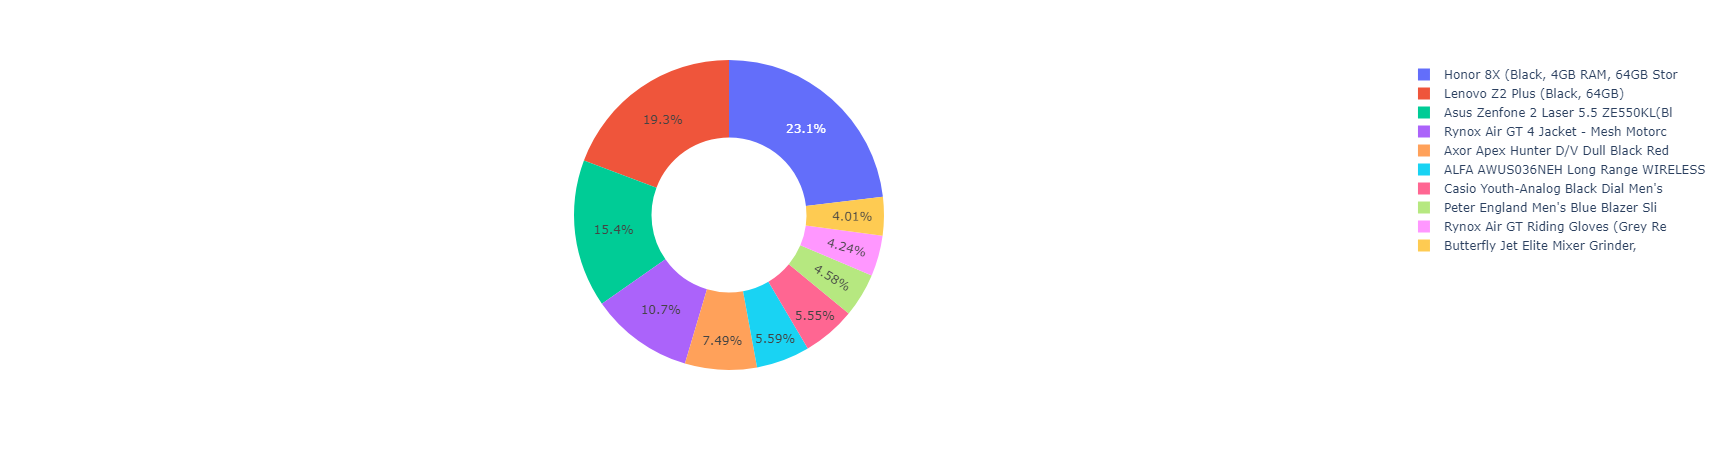

In [25]:
px.pie(data_frame=product_price[:10],values='Price',hover_data=['Product Name'],names='shorted_names',hole=0.5)

#### Inference 
Mobile phones are the most costly products in the dataset, while appliances and apparels comes later

---

### Last 10 Products

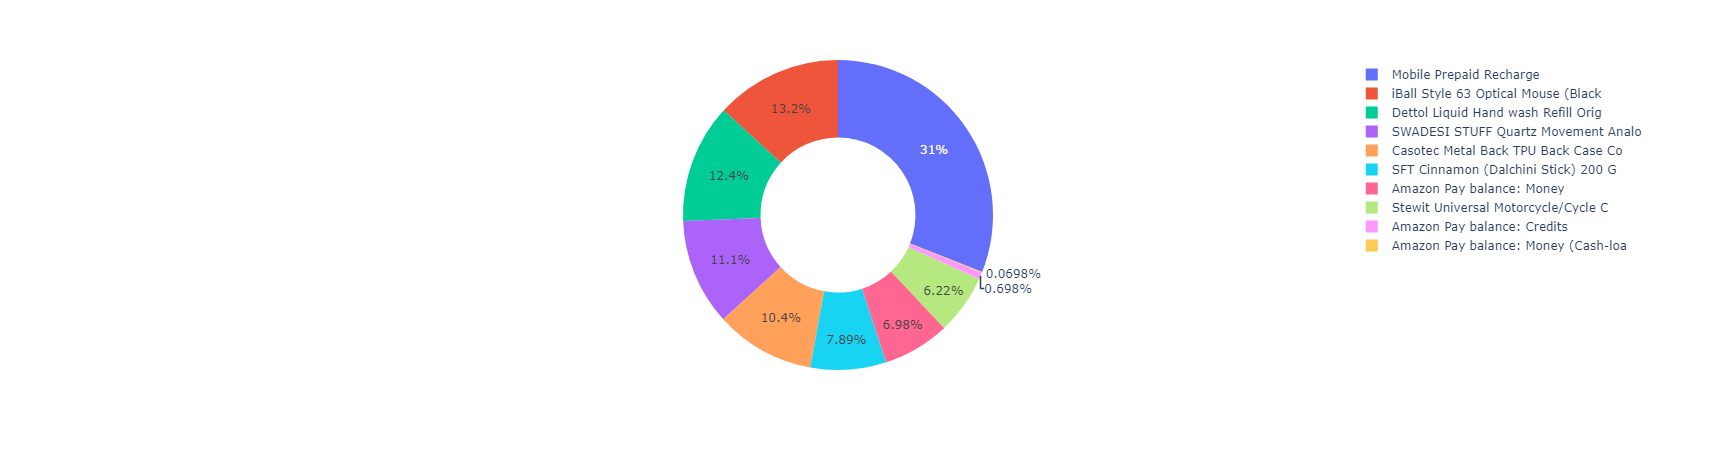

In [26]:
px.pie(data_frame=product_price[-19:],values='Price',hover_data=['Product Name'],names='shorted_names',hole=0.5)

#### Inference
Groceries, accessories and related products are the least costly products and are bought in very few quantities

---

#### Investigate why ***Mobile Prepaid Recharge*** is ranked between

In [27]:
product_price.loc[product_price['Product Name'] == 'Mobile Prepaid Recharge']

,Price,Product Name,Tax,Order Date,shorted_names
60,399.0,Mobile Prepaid Recharge,0.0,2020-03-21 07:41:19,Mobile Prepaid Recharge
90,399.0,Mobile Prepaid Recharge,0.0,2018-06-23 02:20:35,Mobile Prepaid Recharge
77,199.0,Mobile Prepaid Recharge,0.0,2018-11-14 10:45:20,Mobile Prepaid Recharge
80,199.0,Mobile Prepaid Recharge,0.0,2018-10-17 03:57:54,Mobile Prepaid Recharge
78,100.0,Mobile Prepaid Recharge,NaN,2018-11-11 06:23:38,Mobile Prepaid Recharge
83,49.0,Mobile Prepaid Recharge,NaN,2018-10-13 11:44:25,Mobile Prepaid Recharge
84,49.0,Mobile Prepaid Recharge,NaN,2018-10-13 11:40:24,Mobile Prepaid Recharge
82,49.0,Mobile Prepaid Recharge,NaN,2018-10-13 11:47:37,Mobile Prepaid Recharge
81,49.0,Mobile Prepaid Recharge,NaN,2018-10-13 12:05:21,Mobile Prepaid Recharge
88,40.0,Mobile Prepaid Recharge,0.0,2018-06-26 05:26:27,Mobile Prepaid Recharge


Mobile Prepaid Recharge is bought multiple times and in varying plan cost over some span of time, lets plot it for better understanding

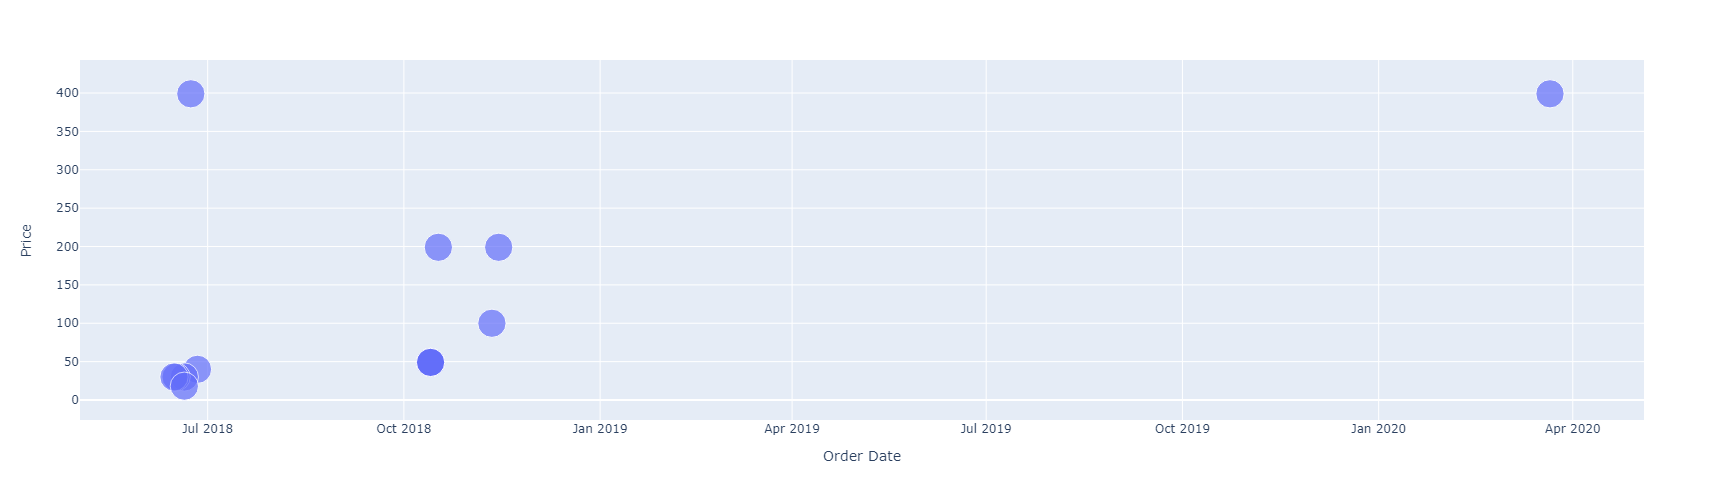

In [28]:
# Fix Size with a func/loop
px.scatter(data_frame=product_price.loc[product_price['Product Name'] == 'Mobile Prepaid Recharge'], x='Order Date', y='Price',height=500,width=900,size=[5,5,5,5,5,5,5,5,5,5,5,5,5,5])


#### Inference
Now that we plot it we see some records scattered across the plot, this gives an insight as to why the price in barplot was stacked with multiple records

### Orders time

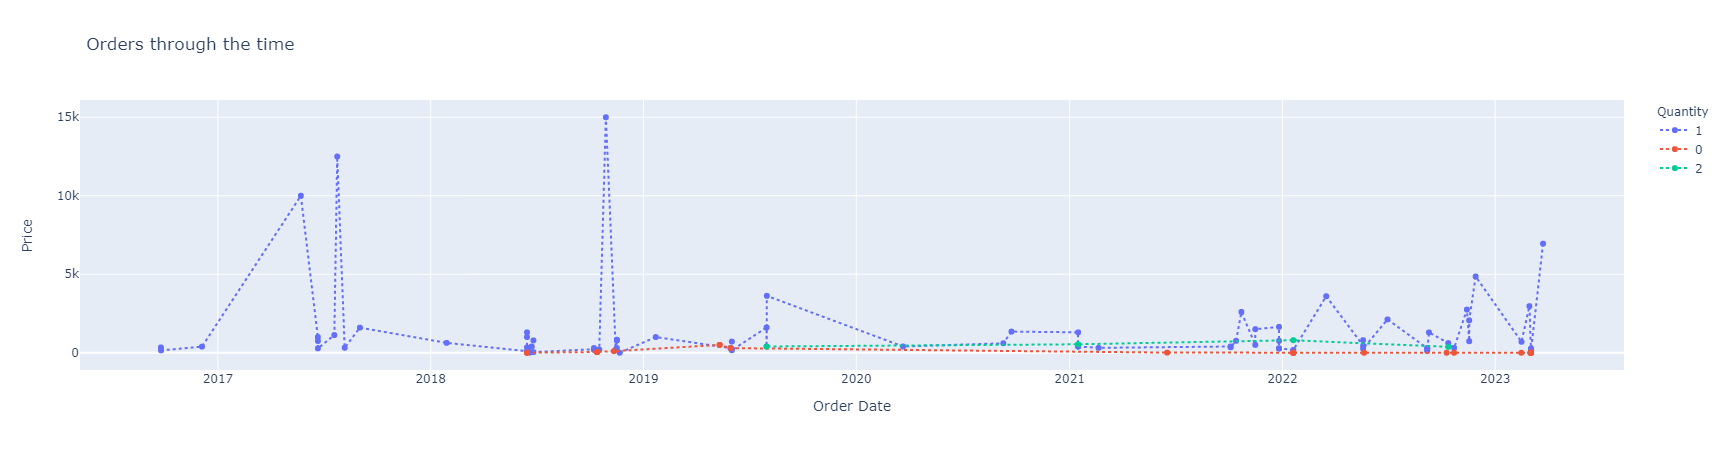

In [29]:
px.line(x='Order Date', y='Total Owed',data_frame=orders_df,
       title='Orders through the time',hover_data=['Product Name'],labels={'Total Owed':'Price'},color='Quantity',line_dash_sequence=['dot'],markers=True)

#### Inference
Around late **2019** to late **2021**, the number of orders were lowest and the products were not relatively that costly when compared to other times excluding the stated time-range 

### Tax of products

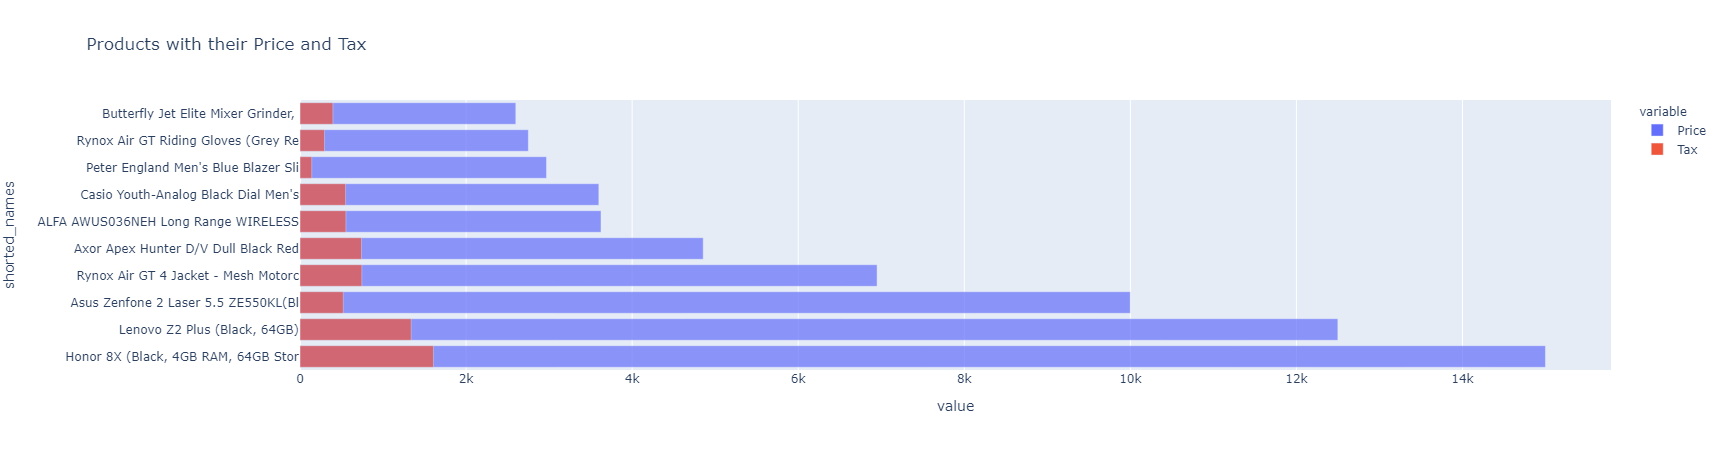

In [30]:
px.bar(data_frame=product_price[:10],x=['Price','Tax'],y='shorted_names',barmode='overlay',opacity=0.7,
       title='Products with their Price and Tax',
       hover_data=['Product Name'])

#### Inference
we observe that some products have taxes more than the other products even though they cost less or other products cost more than them, one thing to notice is the date at which product is ordered, as over the time government changes policies and taxes which affects companies and their products accordingly.

In [35]:
orders_df.head()

,Order ID,Order Date,Currency,Unit Price,Unit Price Tax,Shipping Charge,Total Discounts,Total Owed,Shipment Item Subtotal,Shipment Item Subtotal Tax,ASIN,Product Condition,Quantity,Payment Instrument Type,Order Status,Shipment Status,Ship Date,Shipping Option,Product Name
0,402-3170714-4132350,2023-03-24 02:28:49,INR,6205.36,744.64,0.00,0.0,6950.0,6205.36,744.64,B0BSR1J8XW,New,1,NaN,Closed,Shipped,2023-03-27 07:43:22,Std IN EZ Metro COD,Rynox Air GT 4 Jacket - Mesh Motorcycle Riding...
1,402-0957206-0852356,2023-03-03 08:02:35,INR,226.27,40.73,6.10,0.0,267.0,226.27,40.73,B00S5SAFDQ,New,1,NaN,Closed,Shipped,2023-03-13 09:24:47,std-in-10k,3M Auto Specialty Tyre Dresser (250 ml) | Long...
2,402-0957206-0852356,2023-03-03 08:02:35,INR,168.64,30.36,6.10,0.0,199.0,366.10,65.90,B01ESPB2VI,New,1,NaN,Closed,Shipped,2023-03-03 11:15:18,std-in-10k,Motul C2 Chain Lube for All Bikes (150 ml)
3,402-0957206-0852356,2023-03-03 08:02:35,INR,79.46,9.54,4.29,0.0,89.0,79.46,9.54,B09XKH1R5N,New,1,NaN,Closed,Shipped,2023-03-03 09:31:07,std-in-10k,Stewit Universal Motorcycle/Cycle Chain Cleane...
4,402-0957206-0852356,2023-03-03 08:02:35,INR,197.46,35.54,6.10,0.0,233.0,366.10,65.90,B01ESPB2V8,New,1,NaN,Closed,Shipped,2023-03-03 11:15:18,std-in-10k,Motul C1 Chain Clean for All Bikes (150 ml)


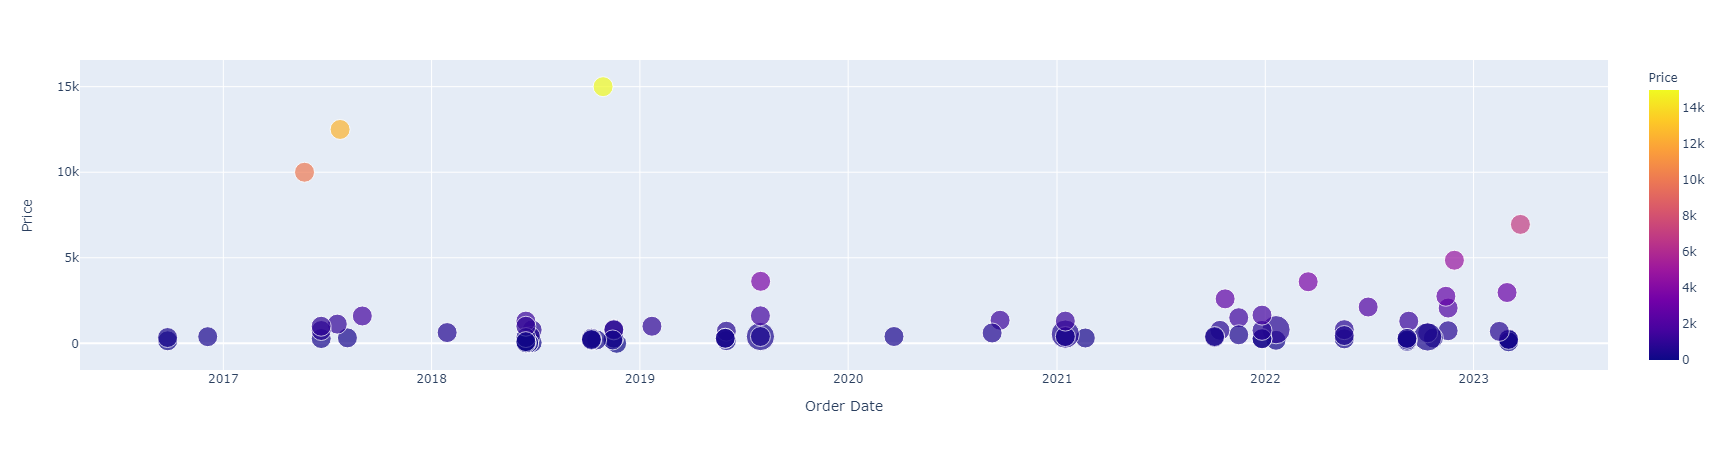

In [36]:
px.scatter(data_frame=orders_df, x='Order Date', y='Total Owed', color='Total Owed',
           labels={'Total Owed': 'Price'},hover_data=['Product Name'],size='Quantity')

#### Inference
The sizes signify the Quantity, color represents the Price of the Products, Let's find out the average spend (mean)

In [37]:
orders_df['Total Owed'].describe()

count      113.000000
mean       965.608407
std       2194.172780
min          0.000000
25%         49.000000
50%        312.000000
75%        785.000000
max      14999.000000
Name: Total Owed, dtype: float64

In [38]:
orders_df.head(2)

,Order ID,Order Date,Currency,Unit Price,Unit Price Tax,Shipping Charge,Total Discounts,Total Owed,Shipment Item Subtotal,Shipment Item Subtotal Tax,ASIN,Product Condition,Quantity,Payment Instrument Type,Order Status,Shipment Status,Ship Date,Shipping Option,Product Name
0,402-3170714-4132350,2023-03-24 02:28:49,INR,6205.36,744.64,0.0,0.0,6950.0,6205.36,744.64,B0BSR1J8XW,New,1,NaN,Closed,Shipped,2023-03-27 07:43:22,Std IN EZ Metro COD,Rynox Air GT 4 Jacket - Mesh Motorcycle Riding...
1,402-0957206-0852356,2023-03-03 08:02:35,INR,226.27,40.73,6.1,0.0,267.0,226.27,40.73,B00S5SAFDQ,New,1,NaN,Closed,Shipped,2023-03-13 09:24:47,std-in-10k,3M Auto Specialty Tyre Dresser (250 ml) | Long...


#### An interactive 3d plot for detailed information

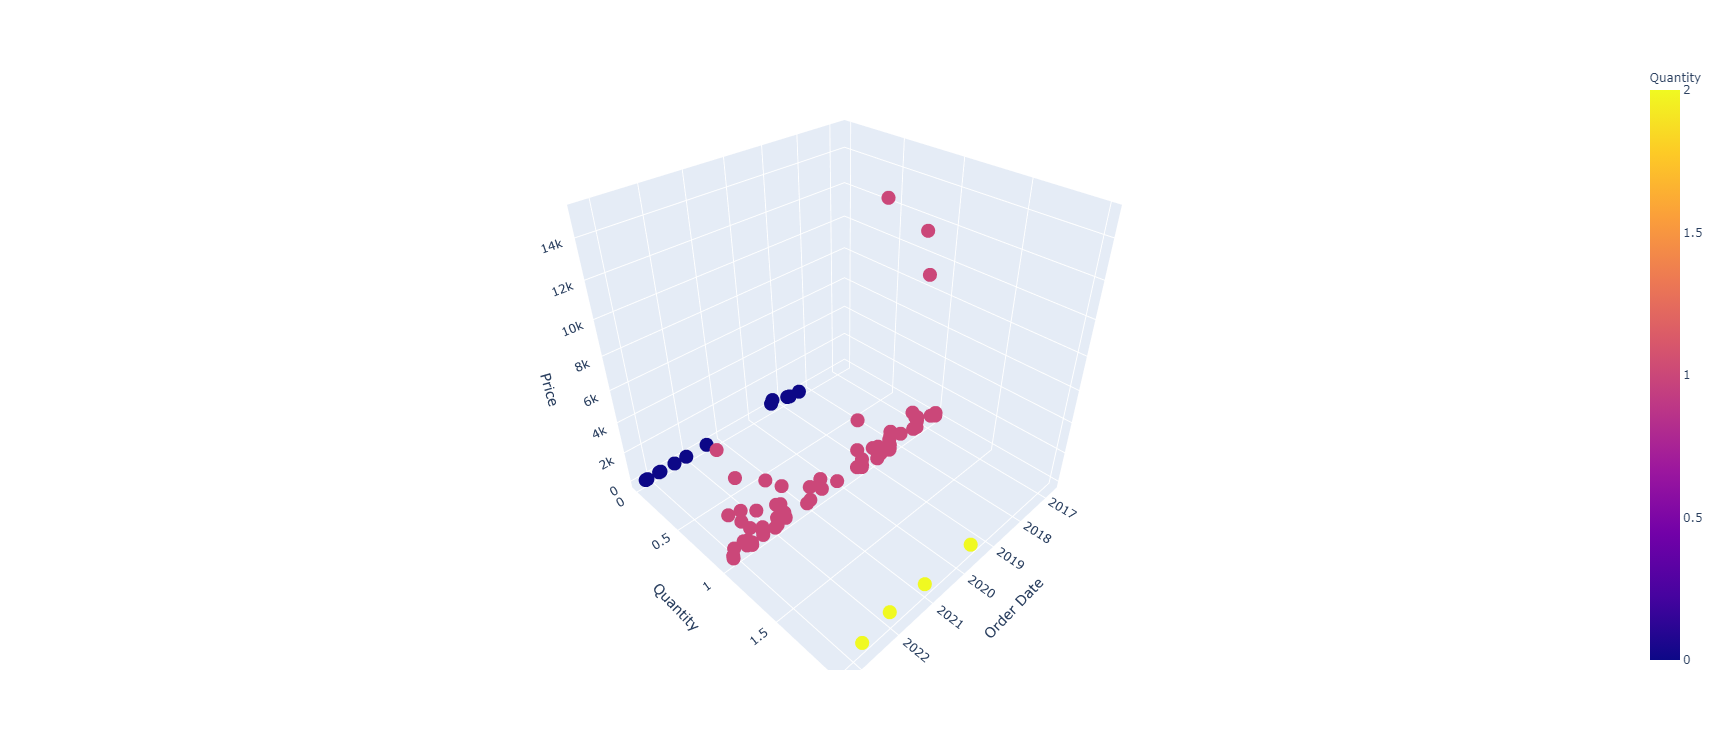

In [39]:
px.scatter_3d(data_frame=orders_df, x='Order Date', z='Total Owed',y='Quantity',hover_data=['Product Name'],labels={'Total Owed':'Price'},color='Quantity',width=800,height=750)

In [40]:
orders_df.groupby(['Product Name'])[['Total Owed']].sum()

,Total Owed
Product Name,
3M Auto Specialty Tyre Dresser (250 ml) | Long lasting tyre Gloss | Fading and Crack Prevention.,267.00
ALFA AWUS036NEH Long Range WIRELESS 802.11b/g/n Wi-Fi USBAdapter,3625.00
Amazon Pay balance: Credits,10.00
Amazon Pay balance: Money,2100.00
Amazon Pay balance: Money (Cash-load),1.00
...,...
eSplanade - 5 inches - Singing Bowl Tibetan Buddhist Prayer Instrument With Striker Stick | OM Bell | OM Bowl | Meditation Bowl | Music Therapy,1295.00
iBall Style 63 Optical Mouse (Black),189.00
"iClever HS14 Headphones for Girls, Kids Headphones with Mic, 94dB Volume Limited, Adjustable Headband, Foldable, Wired Over Ear Child Headset for Onli",736.22
